In [47]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [48]:
dataset = pd.read_csv('IRIS.csv')
type(dataset)


pandas.core.frame.DataFrame

In [49]:
X = dataset.iloc[:, 0:4 ].values
X.shape
type(X)

numpy.ndarray

In [50]:
num_data = X.shape[0]

num_features = X.shape[1]
# k number of clusters
k = 3

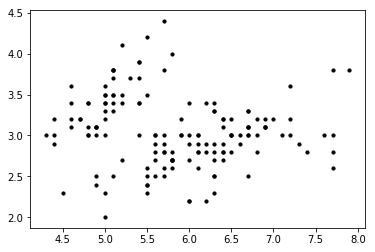

In [51]:
plt.scatter(X[:,0] , X[:,1] , s=10 , c='black')
plt.show()

In [52]:
# initialize centroids
centroids = np.zeros((k,num_features))

In [53]:
for i in range(k):
    centroids[i] = X[i]

In [54]:
centroids

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

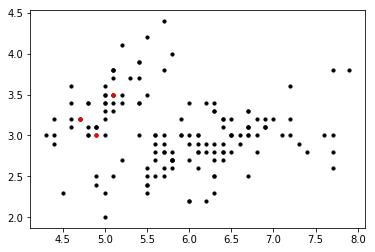

In [55]:
plt.scatter(X[:,0] , X[:,1] , s=10 , c='black')
plt.scatter(centroids[:,0] , centroids[:,1] , s=10 , c='red')
plt.show()

In [56]:
#mean = np.mean(X, axis = 0)
#std = np.std(X, axis = 0)
#centers = std*np.random.randn(k,num_features) + mean

In [57]:
#centers

array([[5.85365454, 3.05502267, 7.16264798, 0.76955246],
       [5.90051867, 3.79026074, 0.36632149, 1.8339265 ],
       [6.38103567, 2.45480552, 4.90022126, 1.01044398]])

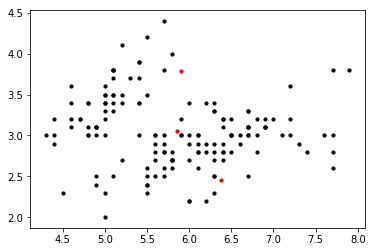

In [58]:
plt.scatter(X[:,0] , X[:,1] , s=10 , c='black')
plt.scatter(centers[:,0] , centers[:,1] , s=10 , c='red')
plt.show()

In [59]:
centroids.shape

(3, 4)

In [60]:
centroids_old = np.zeros(centroids.shape)

In [61]:

#def eucl_dist (a , b):
#    sq_distance = 0
#    for i in range(len(a)):
#        sq_distance += (a[i] - b[i])**2
#    dist = sqrt(sq_distance)
#    return dist
    

In [62]:
len(centroids)

3

In [63]:
def distance ( a, b , axis = 1):
    return np.linalg.norm (a - b , axis = axis)

In [64]:
convergence = distance (centroids , centroids_old , None)

In [68]:
cluster = np.zeros(num_data)

In [72]:
while convergence!= 0:
    
    #assign each data point to closest cluster
    for i in range(len(X)):
        dist = distance( X[i] , centroids)
        cluster_num = np.argmin(dist)
        cluster[i] = cluster_num
        
    centroids_old = np.copy(centroids)
    
    #calculate new centroids
    for i in range(k):
        points = [X[j] for j in range(len(X)) if cluster[j]==i ]
        if points:
            centroids[i] = np.mean(points , axis=0 )
    
    convergence = distance (centroids , centroids_old ,None )
    

print(cluster)
    
        

[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 1.]


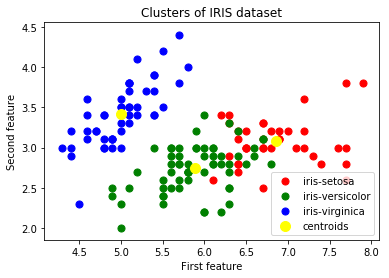

In [73]:
plt.scatter(X[cluster==0 , 0] , X[cluster==0 , 1], s=50 , c='red', label='iris-setosa')
plt.scatter(X[cluster==1 , 0] , X[cluster==1 , 1], s=50 , c='green', label='iris-versicolor')
plt.scatter(X[cluster==2 , 0] , X[cluster==2 , 1], s=50 , c='blue', label='iris-virginica')
plt.scatter(centroids[:,0], centroids[:, 1], s= 100 , c='yellow', label='centroids')
plt.title('Clusters of IRIS dataset')
plt.xlabel('First feature')
plt.ylabel('Second feature')
plt.legend()
plt.show()